In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [26]:
data = pd.read_csv("housing.csv")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

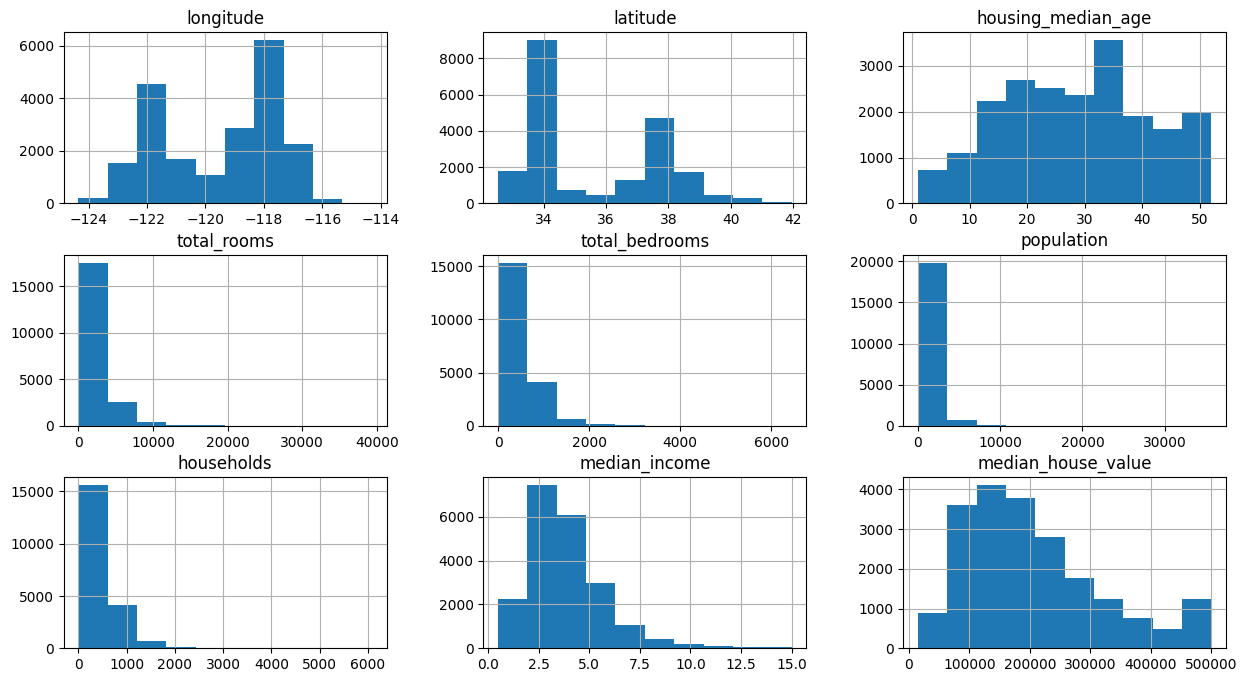

In [27]:
data.hist(figsize=(15,8))

In [28]:
data.dropna(inplace =True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
train_data = x_train.join(y_train)

In [33]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15455,-117.29,33.18,17.0,821.0,176.0,436.0,168.0,3.1667,NEAR OCEAN,160600.0
5523,-118.36,33.98,40.0,1113.0,234.0,584.0,231.0,3.0927,<1H OCEAN,316000.0
8353,-118.32,33.95,44.0,2023.0,325.0,992.0,326.0,4.6667,<1H OCEAN,175600.0
14407,-117.25,32.77,35.0,2494.0,690.0,1126.0,624.0,4.0313,NEAR OCEAN,385300.0
6582,-118.20,34.21,42.0,1493.0,237.0,665.0,224.0,6.7571,<1H OCEAN,443900.0
...,...,...,...,...,...,...,...,...,...,...
10357,-117.66,33.59,18.0,4552.0,706.0,1918.0,671.0,7.5791,<1H OCEAN,288100.0
2458,-119.59,36.52,35.0,990.0,192.0,674.0,178.0,3.3214,INLAND,101600.0
11462,-117.99,33.67,19.0,3808.0,790.0,1776.0,756.0,4.6250,<1H OCEAN,282200.0
14481,-117.25,32.82,23.0,6139.0,826.0,2036.0,807.0,9.5245,NEAR OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

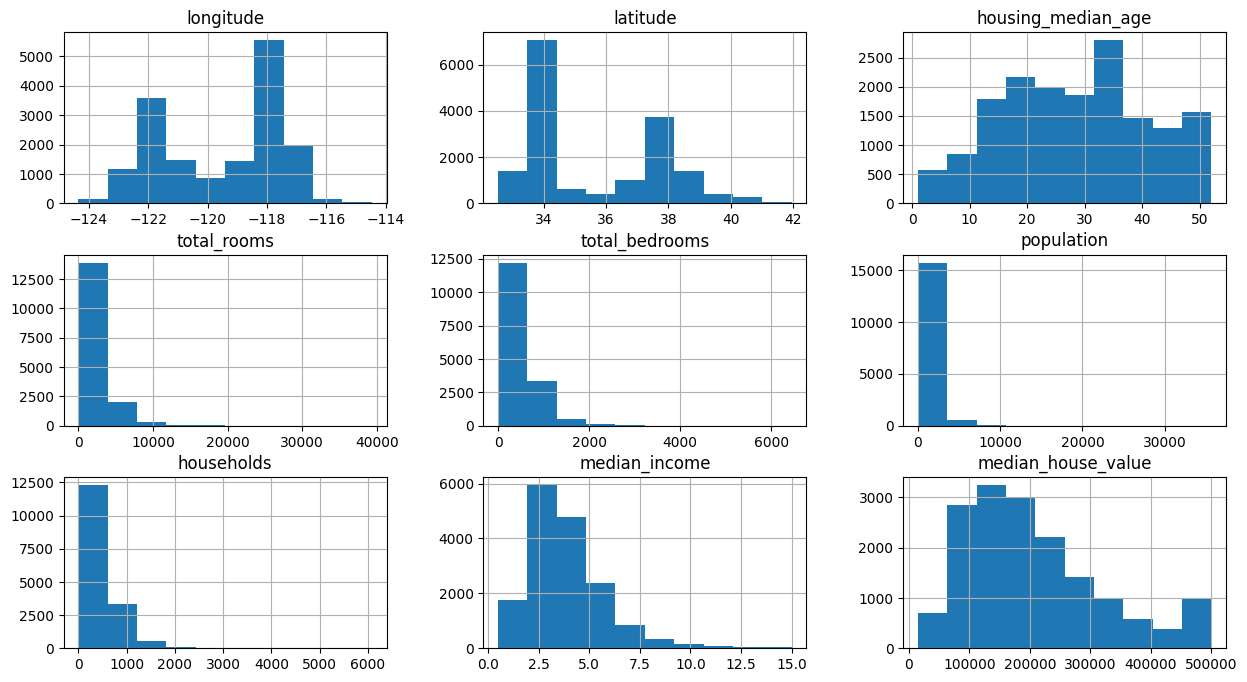

In [34]:
train_data.hist(figsize=(15,8))

In [35]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

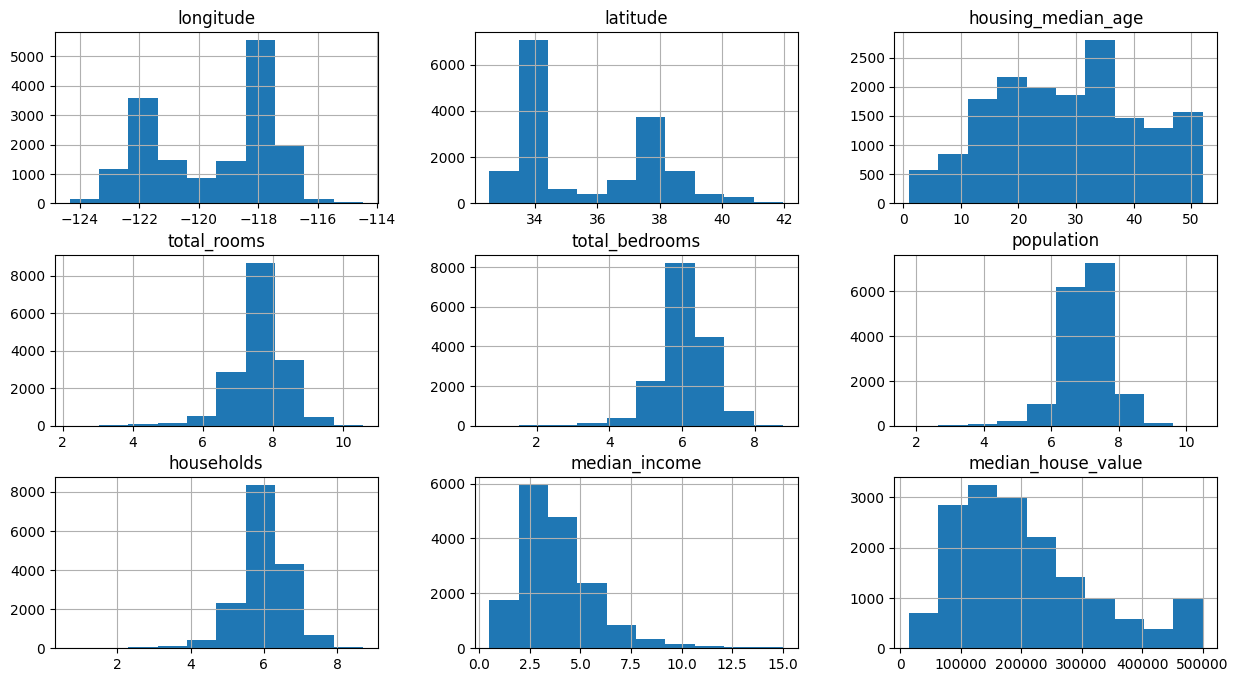

In [36]:
train_data.hist(figsize=(15,8))

In [37]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

<Axes: xlabel='latitude', ylabel='longitude'>

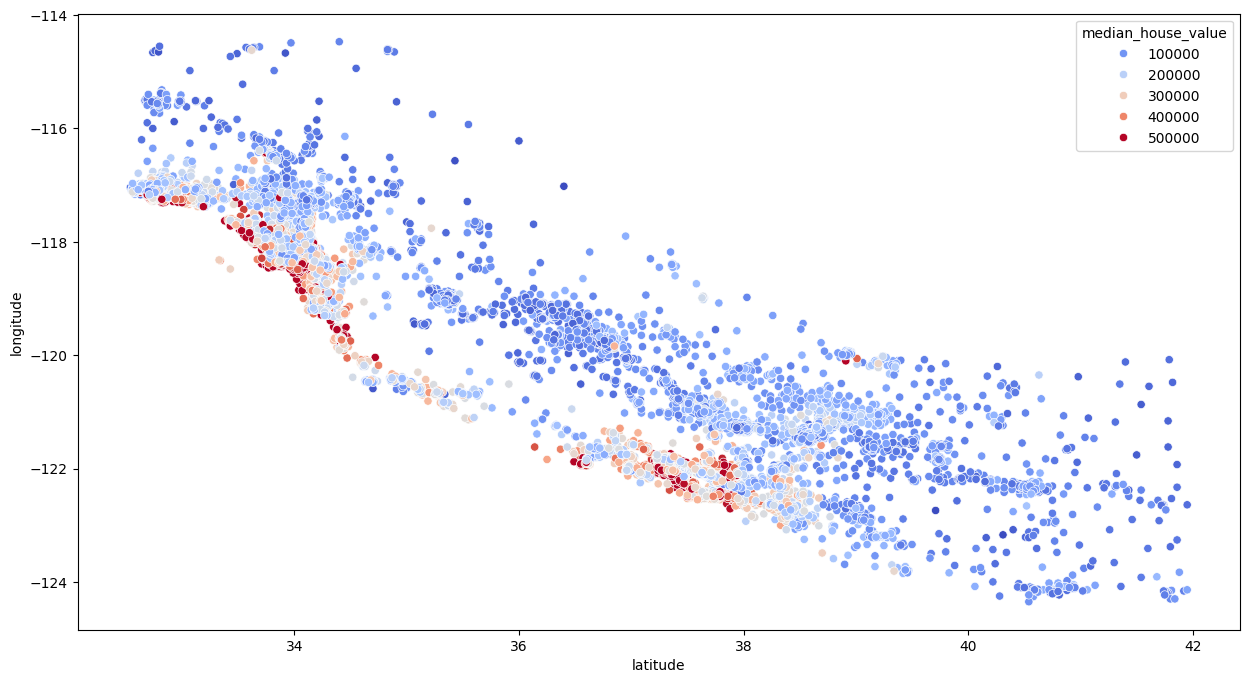

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

In [39]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_bedrooms']/ train_data['households']

In [40]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
test_data = x_test.join(y_test)


In [42]:

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_bedrooms']/ test_data['households']

In [43]:
x_test,y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']

In [44]:
reg.score(x_test,y_test)

0.6641602091136207